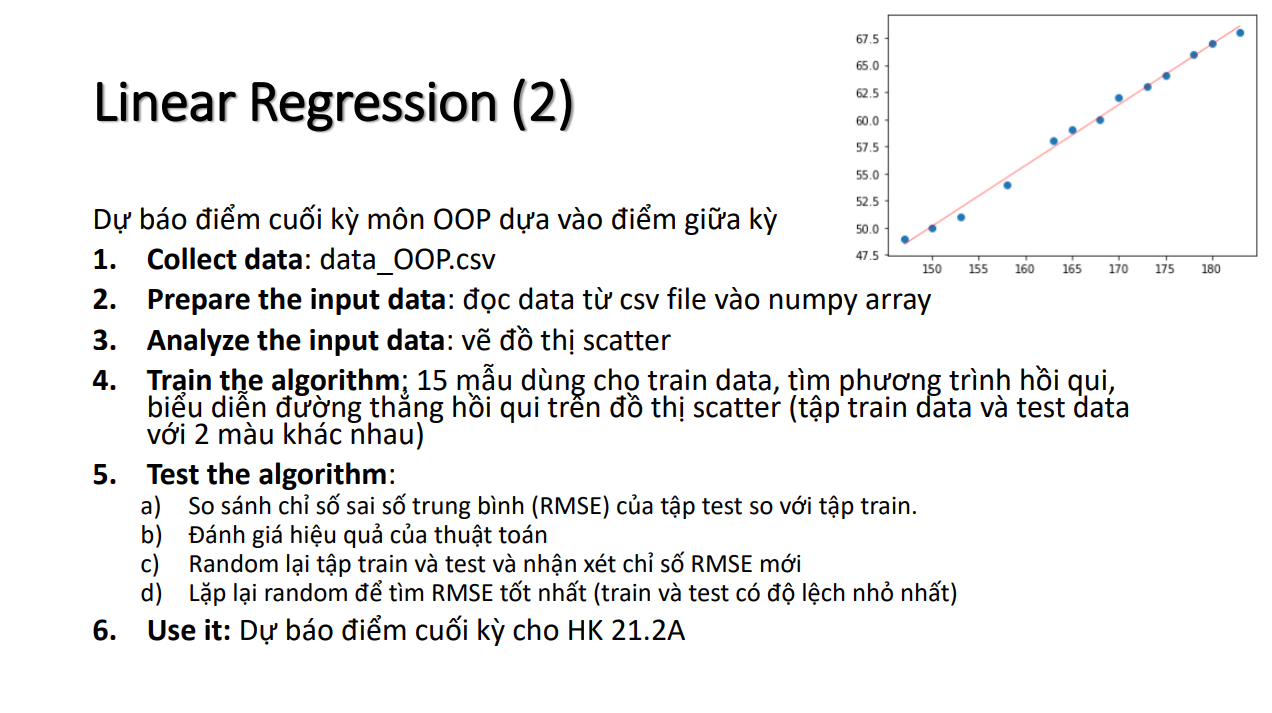

# Ghi chú: Bài này mình làm là để tham khảo, có các cú pháp và nhiều cách làm khác nhau, đề phòng bài thi bị ràng buộc không cho dùng cách này thì chúng ta còn cách khác, nên chỉ tham khảo các cách xử lý liệu thôi

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import sklearn.model_selection as ms
from sklearn import metrics

# 1. Collect data

File data của cô tải về rồi đẩy lên github, sau đó ở mục 2 kéo bằng URI về (Style của tui làm nó v r :v)

Các bạn có thể đọc trực tiếp từ máy local của mình

# 2. Prepare the input data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/DangCao1999/ML-Study/master/BaiHoc/OnTapTuan15/data_OOP.csv")
data.head()

,DiemGK,DiemCK
0,6.3,7.0
1,6.7,7.0
2,6.0,7.5
3,7.8,7.0
4,9.5,8.5


**Lấy dữ liệu với điều kiện trong dataframe**

In [29]:
data.loc[data.DiemGK < 7]

,DiemGK,DiemCK
0,6.3,7.0
1,6.7,7.0
2,6.0,7.5


In [6]:
data[(data.DiemGK > 7) & (data.DiemGK < 8)]

,DiemGK,DiemCK
3,7.8,7.0
12,7.2,6.0
17,7.7,9.0
20,7.8,6.0


# 3. Vẽ đồ thị

**Vẽ theo đề yêu cầu**

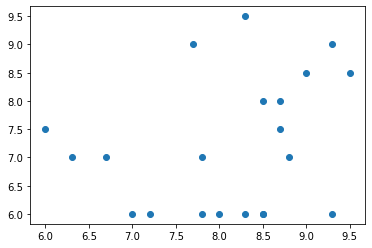

In [11]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

**Vẽ đồ thị vui thôi nha ae để vô thi lỡ có gì tham khảo**

Với điểm bé hơn 7 thì màu đỏ

với điểm 7 - 8 thì màu vàng

với điểm lớn hơn 8 thì màu xanh nước biển

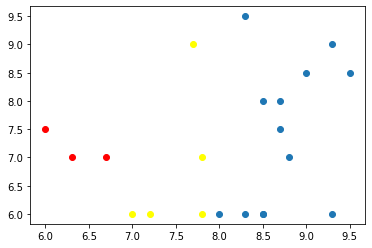

In [7]:
plt.scatter(data[data.DiemGK < 7].iloc[:,0], data[data.DiemGK < 7].iloc[:,1], color="red")
plt.scatter(data[(data.DiemGK >= 7) & (data.DiemGK < 8)].iloc[:,0], data[(data.DiemGK >= 7) & (data.DiemGK < 8)].iloc[:,1], color="yellow")
plt.scatter(data[data.DiemGK >= 8].iloc[:,0],data[data.DiemGK >= 8].iloc[:,1])
plt.show()

# 4 Train the algorithm: 15 mẫu dùng cho train data, tìm phương trình hồi qui, biểu diễn đường thẳng hồi qui trên đồ thị scatter (tập train data và test data với 2 màu khác nhau)

## 4.1 Đề Phòng cô không cho dùng test split

### 4.1.1 Lấy data theo kiểu bình thường không random

**Lấy 15 điểm đuôi cho train - lấy 5 đầu cho test**

In [45]:
# có thể .values để nó chuyển về mảng numpy
train = data.tail(15).values
test = data.head(5).values

# hoặc dùng np.array()
# train = np.array(data.tail(15))
# test = np.array(data.head(5))

In [46]:
# vẫn giữ dataframe
# train = data.tail(15)
# test = data.head(5)
# --------------cách khác---------------
# train = data.iloc[:15]
# test = data.iloc[15:21]

### 4.1.2 Lấy data theo kiểu bình thường có random

In [37]:
# shuffle cái dataframe
data_new = data.sample(frac=1)
# do data đã bị xáo trộn nên giờ có thể coi như là mình đang lấy ngẫu nhiên quay lại theo 4.1.1
train_new = data_new.tail(15)
test_new = data_new.head(5)

**Sau khi có train và test thì chúng ta tách dữ liệu ra X,Y - với index 0 là X và 1 là Y**

In [53]:
train_X = train[:,0]
train_Y = train[:,1]
test_X = test[:,0]
test_Y = test[:,1]
print(train_X)

[8.5 8.3 9.  8.5 8.7 9.3 7.2 8.7 8.8 8.3 9.3 7.7 7.  8.  7.8]


**Do train_X là mảng 1 chiều chúng ta cần reshape mảng 2 chiều**

In [59]:
print(train.shape)
train_X = train_X.reshape(15,1)
test_X = test_Y.reshape(5,1)

(15, 2)


### 4.2 Lấy data dùng split để nó random

In [79]:
X = np.array([data.iloc[:, 0]]).T
Y = data.iloc[:, 1]

In [80]:
print(X)

[[6.3]
 [6.7]
 [6. ]
 [7.8]
 [9.5]
 [8.5]
 [8.5]
 [8.3]
 [9. ]
 [8.5]
 [8.7]
 [9.3]
 [7.2]
 [8.7]
 [8.8]
 [8.3]
 [9.3]
 [7.7]
 [7. ]
 [8. ]
 [7.8]]


In [81]:
train_X, test_X, train_Y, test_Y = ms.train_test_split(X, Y, test_size=0.2, random_state=4)

# 4.3 Training

In [84]:
lr = LinearRegression().fit(train_X, train_Y)

# 4.4 Vẽ đồ thị

### 4.4.1 Xác định phương trình đường thẳng

In [87]:
print(lr.coef_)
print(lr.intercept_)
print("y =",lr.coef_[0],"X +",lr.intercept_)

[0.27639956]
5.183271130625685
y = 0.2763995609220638 X + 5.183271130625685


### 4.4.2 Vẽ đường đường thẳng và tập train_test

Xác định tọa độ y tương ứng với train_X để vẽ đường thẳng

In [114]:
train_y_pred = lr.coef_[0]*train_X + lr.intercept_
test_y_pred = lr.predict(test_X)
#y1 = lnr.predict(x.reshape(10,1))

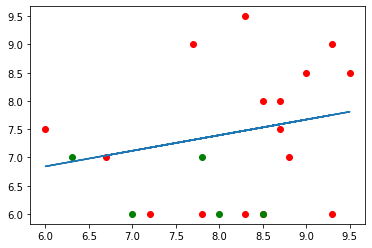

In [115]:
plt.plot(train_X,train_y_pred)
plt.scatter(train_X,train_Y, color="red")
plt.scatter(test_X, test_Y, color="green")
plt.show()

# 5. Test algorithm

## 5.a So sánh chỉ số RMSE của tập train với tập test

In [119]:
mse_train = metrics.mean_squared_error(train_Y, train_y_pred)
mse_test = metrics.mean_squared_error(test_Y, test_y_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

1.1631561448677379
1.064370300862276


## 5.b Đánh giá độ hiệu quả của thuật toán

## 5.c 5.d Retrain tìm RMSE tốt nhất

In [145]:
#random lại dữ liệu
train_X, test_X, train_Y, test_Y = ms.train_test_split(X, Y, test_size=0.2)
lr2 = LinearRegression().fit(train_X, train_Y)
mse_train = metrics.mean_squared_error(train_Y, train_y_pred)
mse_test = metrics.mean_squared_error(test_Y, test_y_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

1.2672830974005729
1.2067662557324665


---------------------------KẾT Thúc--------------------

In [131]:
#Chỉ tham khảo, trừ khi đề yêu cầu (Có thể tui làm sai)
score2 = lr.score(train_X, train_Y)
score3 = lr.score(test_X, test_Y)
print(score2)
print(score3)

0.04783327109290447
-3.72035057232355
